In [1]:
try:
    import geemap
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap

In [1]:
import geemap
import ee

# Initialize Google Earth Engine
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

# Create an interactive map
Map = geemap.Map()

# Display the map
Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [2]:
center_lat = 9.0
center_lon = 7.4
zoomlevel=6

# initialize our map
Map = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
Map.addLayerControl()
Map

In [3]:
dmsp92id = "NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101992"
dmsp92 = ee.Image(dmsp92id)

In [4]:
Map2 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
Map2.addLayer(dmsp92, name='DMSP NTL 1992', opacity=0.75)

Map2.addLayerControl()
Map2

In [5]:
Map4 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
Map4.addLayer(dmsp92.mask(dmsp92), name='DMSP NTL 1992 masked', opacity=0.75)

Map4.addLayerControl()
Map4

In [3]:
# initial map object centered on Abuja
Map5 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)

# add our alternate basemap
Map5.add_basemap("SATELLITE")

# add our 1992 (and remember to create a mask and change opacity to 75%)
Map5.addLayer(dmsp92.mask(dmsp92), name='DMSP NTL 1992 masked', opacity=0.75)

Map5.addLayerControl()
Map5

NameError: name 'center_lat' is not defined

In [4]:
import geemap.eefolium as geemap
import ee

# Initialize the Earth Engine module.
ee.Initialize()

# Define the region of interest as Nigeria.
nigeria = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017') \
            .filter(ee.Filter.eq('country_na', 'Nigeria'))

# Define the VIIRS image.
viirs = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG') \
          .filter(ee.Filter.date('2015-01-01', '2015-02-01')) \
          .select('avg_rad') \
          .median() \
          .clip(nigeria)

# Mask out areas with light value of 0
#viirs = viirs.updateMask(viirs.gt(0))

# Create a map centered at Nigeria.
Map = geemap.Map(center=[9.0820, 8.6753], zoom=6)

# Add the clipped VIIRS data to the map.
vis_params = {
  'min': 0,
  'max': 20,
  'palette': ['blue', 'green', 'yellow', 'orange', 'red']
}
Map.addLayer(viirs, vis_params, 'VIIRS 2015', opacity = 0.75)

# Display the map.
Map


In [5]:
import geemap.eefolium as geemap
import ee

# Initialize the Earth Engine module.
ee.Initialize()

# Define the region of interest as South Korea.
south_korea = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Republic of Korea'))
japan = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Dem People\'s Rep of Korea'))

roi = south_korea.merge(japan)

# Define the VIIRS image.
#viirs = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG') \
#          .filter(ee.Filter.date('2015-01-01', '2015-12-31')) \
#          .select('avg_rad') \
#          .median() \
#          .clip(roi)

viirs = ee.ImageCollection("NOAA/VIIRS/001/VNP46A2") \
          .filter(ee.Filter.date('2015-01-01', '2015-12-31')) \
          .select('DNB_BRDF_Corrected_NTL') \
          .median() \
          .clip(roi)

# Mask out areas with light value of 0
#viirs = viirs.updateMask(viirs.gt(0))

# Create a map centered at South Korea.
Map = geemap.Map(center=[36.5, 127.8], zoom=6)

# Add the clipped VIIRS data to the map with a colorful palette and an opacity of 0.75.
vis_params = {
    'min':0,
    'max':60,
  'palette': ['blue', 'green', 'yellow', 'orange', 'red'],
  'opacity': 0.75
}
Map.addLayer(viirs.mask(viirs), vis_params, 'VIIRS 2015')

# Display the map.
Map

In [6]:
viirs2 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
          .filter(ee.Filter.date('2015-01-01', '2015-12-31')) \
          .select('avg_rad') \
          .median() \
          .clip(roi)

Map2 = geemap.Map(center=[36.5, 127.8], zoom=6)
Map2.addLayer(viirs2, vis_params, 'VIIRS 2015')
Map2

In [102]:
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").select("avg_rad")

viirs_korea = viirs.map(lambda x: x.clip(roi))

In [108]:
viirs_korea_2018 = viirs_korea.filterDate('2018-01-01', '2018-12-31').median()
viirs_korea_2019 = viirs_korea.filterDate('2019-01-01', '2019-12-31').median()
Map3 = geemap.Map(center=[36.5, 127.8], zoom=6)
Map3.addLayer(viirs_korea_2018, vis_params, 'viirs_korea_2018', opacity=0.75)
Map3.addLayer(viirs_korea_2019, vis_params, 'viirs_korea_2019', opacity=0.75)
Map3.addLayerControl()
Map3


In [7]:
import geemap
import ee
ee.Initialize()
vcm_2015_australia = ee.Image.loadGeoTIFF("gs://2015_composite_australia/SVDNB_npp_20150101-20151231_00N060E_vcm_v10_c201701311200.avg_rade9-COG.tif")

In [8]:
# Mask out areas with light value of 0
vcm_2015_australia = vcm_2015_australia.updateMask(vcm_2015_australia.gt(0))

australia = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Australia'))

vcm_2015_australia = vcm_2015_australia.clip(australia)

Map4 = geemap.Map()
Map4.addLayer(vcm_2015_australia, vis_params, '2015 Annual Composite', opacity = 0.75)
Map4.addLayerControl()
Map4

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [18]:
# loads the 2015 Asia annual composite, which has been cleaned by EOG to filter out noise to a far greater extent than the normal
# monthly data
vcm_orm_ntl_2015_asia = ee.Image.loadGeoTIFF("gs://2015_composite_asia/SVDNB_npp_20150101-20151231_75N060E_vcm-orm-ntl_v10_c201701311200.avg_rade9-COG.tif")

In [37]:
vcm_orm_ntl_2015_asia = vcm_orm_ntl_2015_asia.updateMask(vcm_orm_ntl_2015_asia.gt(0))
viirs2 = viirs2.updateMask(viirs2.gt(0))
Map5 = geemap.Map()
Map5.addLayer(viirs2, vis_params, '2015 VIIRS (dirty)')
Map5.addLayer(vcm_orm_ntl_2015_asia, vis_params, '2015 Annual Composite')
Map5.addLayerControl()
Map5
# Using this map we can see how the vcm_orm_ntl annual composite reduces a very large number of data points to zero.

In [1]:
import geemap, ee
import seaborn as sns
import matplotlib.pyplot as plt
ee.Initialize()

In [4]:
viirs2019_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2019-12-01","2019-12-31") \
                    .select('avg_rad') \
                    .median()
# center on Catalonia
lat = 41.83
lon = 1.67

# initialize our map
map1 = geemap.Map(center=[lat,lon],zoom=7)
map1.add_basemap('SATELLITE')
map1.addLayer(viirs2019_12.mask(viirs2019_12), vis_params, "VIIRS-DNB Dec 2019")
map1.addLayerControl()
map1

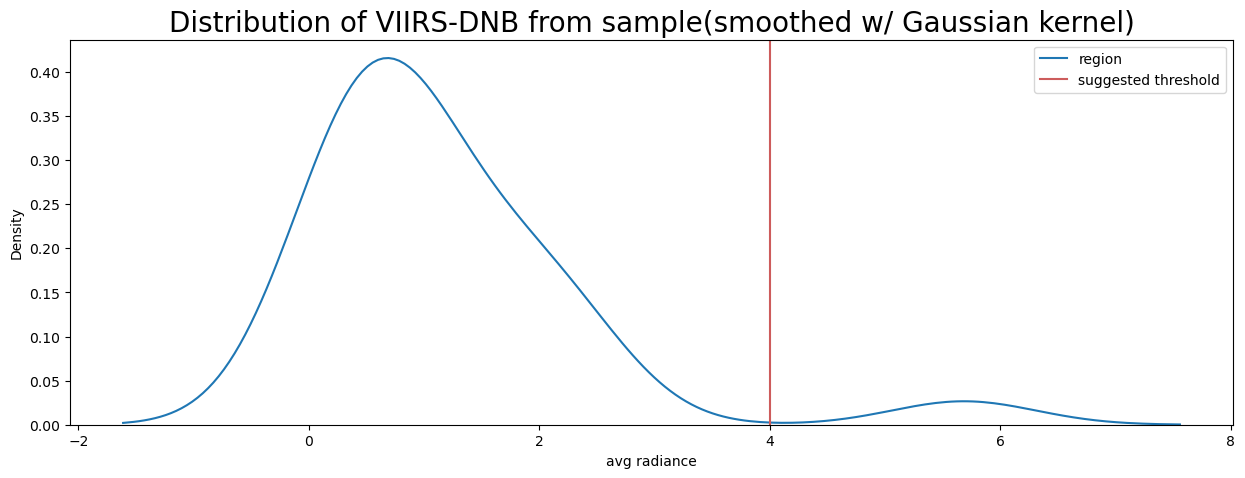

In [16]:
# create a 200 km buffer around the center of Catalonia
aoi = ee.Geometry.Point([lon, lat]).buffer(200000);

# extract a number array from this region
arr = geemap.ee_to_numpy(viirs2019_12, region=aoi)

# create a histogram
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(arr.flatten(), label='region',legend=True, ax=ax)
ax.axvline(4, color='indianred', label='suggested threshold')
plt.legend(fontsize=20)
plt.title('Distribution of VIIRS-DNB from sample(smoothed w/ Gaussian kernel)', fontsize=20);
plt.xlabel('avg radiance')
plt.legend();

In [19]:
viirs2019_12_mask = viirs2019_12.gte(4)

# initialize our map
map2 = geemap.Map(center=[lat,lon],zoom=7)
map2.add_basemap('SATELLITE')

# we'll mask the image with itself to keep the visualization clean
map2.addLayer(viirs2019_12_mask.mask(viirs2019_12_mask), vis_params, "Avg rad >=4")
map2.addLayerControl()
map2

In [20]:
zones = viirs2019_12.gt(1.5).add(viirs2019_12.gt(2)).add(viirs2019_12.gt(5))

# initialize our map
map3 = geemap.Map(center=[lat,lon],zoom=7)
map3.add_basemap('SATELLITE')

map3.addLayer(zones.mask(zones), {'palette':['#cc0909','#e67525','#fff825']}, 'zones')

map3.addLayerControl()
map3

In [4]:
#Imports annual composites for Europe & Asia
import geemap, ee
ee.Initialize()
vcm_orm_ntl_2015_asia = ee.Image.loadGeoTIFF("gs://2015_composite_asia/SVDNB_npp_20150101-20151231_75N060E_vcm-orm-ntl_v10_c201701311200.avg_rade9-COG.tif")
vcm_orm_ntl_2016_asia = ee.Image.loadGeoTIFF("gs://2016_composite_asia/SVDNB_npp_20160101-20161231_75N060E_vcm-orm-ntl_v10_c201807311200.avg_rade9-COG.tif")
vcm_orm_ntl_2015_europe = ee.Image.loadGeoTIFF("gs://2015_composite_europe/SVDNB_npp_20150101-20151231_75N060W_vcm-orm-ntl_v10_c201701311200.avg_rade9-COG.tif")
vcm_orm_ntl_2016_europe = ee.Image.loadGeoTIFF("gs://2016_composite_europe/SVDNB_npp_20160101-20161231_75N060W_vcm-orm-ntl_v10_c201807311200.avg_rade9-COG.tif")

continent_collection_2015 = ee.ImageCollection([vcm_orm_ntl_2015_asia, vcm_orm_ntl_2015_europe])
continent_collection_2016 = ee.ImageCollection([vcm_orm_ntl_2016_asia, vcm_orm_ntl_2016_europe])

mosaic_2015 = continent_collection_2015.mosaic()
mosaic_2016 = continent_collection_2016.mosaic()

eog_mask = mosaic_2015.add(mosaic_2016)

In [5]:
map4 = geemap.Map()

vis_params = {
    'min':0,
    'max':60,
  'palette': ['380245', '23678b', '21908c', '39b185', 'fde725'],
  'opacity': 0.75
}

map4.addLayer(eog_mask.mask(eog_mask), vis_params, 'eog_mask')
map4

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [5]:
import geemap, ee
import seaborn as sns
import matplotlib.pyplot as plt
ee.Initialize()

#Imports annual composites for Europe & Asia
import geemap, ee
ee.Initialize()
vcm_orm_ntl_2015_asia = ee.Image.loadGeoTIFF("gs://2015_composite_asia/SVDNB_npp_20150101-20151231_75N060E_vcm-orm-ntl_v10_c201701311200.avg_rade9-COG.tif")
vcm_orm_ntl_2016_asia = ee.Image.loadGeoTIFF("gs://2016_composite_asia/SVDNB_npp_20160101-20161231_75N060E_vcm-orm-ntl_v10_c201807311200.avg_rade9-COG.tif")
vcm_orm_ntl_2015_europe = ee.Image.loadGeoTIFF("gs://2015_composite_europe/SVDNB_npp_20150101-20151231_75N060W_vcm-orm-ntl_v10_c201701311200.avg_rade9-COG.tif")
vcm_orm_ntl_2016_europe = ee.Image.loadGeoTIFF("gs://2016_composite_europe/SVDNB_npp_20160101-20161231_75N060W_vcm-orm-ntl_v10_c201807311200.avg_rade9-COG.tif")

continent_collection_2015 = ee.ImageCollection([vcm_orm_ntl_2015_asia, vcm_orm_ntl_2015_europe])
continent_collection_2016 = ee.ImageCollection([vcm_orm_ntl_2016_asia, vcm_orm_ntl_2016_europe])

mosaic_2015 = continent_collection_2015.mosaic()
mosaic_2016 = continent_collection_2016.mosaic()

eog_mask = mosaic_2015.add(mosaic_2016)
eog_mask = eog_mask.mask(eog_mask)
vis_params = {
    'min':0,
    'max':60,
  'palette': ['380245', '23678b', '21908c', '39b185', 'fde725'],
  'opacity': 0.75
}

turkey = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Turkey'))

eog_mask_turkey = eog_mask.clip(turkey)

In [4]:
vis_params_2 = {
    'min':0,
    'max':4,
  'palette': ['380245', '23678b', '21908c', '39b185', 'fde725'],
  'opacity': 0.75
}

viirs_quarterly = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2012-01-01","2012-12-31") \
                    .select('avg_rad') \
                    .median() \

dmsp13 = ee.Image("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182013").select('stable_lights')

viirs_quarterly_clean = viirs_quarterly.mask(eog_mask)

lat=38.9
lon=32.85
map3 = geemap.Map(center=[lat,lon],zoom=6)
map3.addLayer(dmsp13.clip(turkey), vis_params, name="DMSP Quarterly")
map3.addLayer(viirs_quarterly.clip(turkey), vis_params, "VIIRS Quarterly")
map3.addLayer(viirs_quarterly_clean.clip(turkey), vis_params, "VIIRS Quarterly Clean")
#map3.addLayer(eog_mask_turkey, vis_params, "EOG Mask Turkey")
map3.addLayerControl()
map3

EEException: Image.mask: If one image has no bands, the other must also have no bands. Got 0 and 1.

In [18]:
viirs_quarterly_clean = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2020-05-15","2020-08-15") \
                    .select('avg_rad') \
                    .mean() \
                    #.mask(eog_mask)

mean_SOL = viirs_quarterly_clean.reduceRegion(
                                        reducer = ee.Reducer.mean(), 
                                        geometry = turkey.geometry(),
                                        scale = 50,
                                        maxPixels = 1e9)
print(mean_SOL.getInfo())

{'avg_rad': 1.4818822738233641}


In [19]:
viirs_quarterly_clean = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2014-05-15","2014-08-15") \
                    .select('avg_rad') \
                    .mean() \
                    #.mask(eog_mask)

mean_SOL = viirs_quarterly_clean.reduceRegion(
                                        reducer = ee.Reducer.mean(), 
                                        geometry = turkey.geometry(),
                                        scale = 50,
                                        maxPixels = 1e9)
print(mean_SOL.getInfo())

{'avg_rad': 0.8747715846122801}


In [20]:
viirs_quarterly_clean = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2020-05-15","2020-08-15") \
                    .select('avg_rad') \
                    .mean() \
                    .mask(eog_mask)

mean_SOL = viirs_quarterly_clean.reduceRegion(
                                        reducer = ee.Reducer.mean(), 
                                        geometry = turkey.geometry(),
                                        scale = 50,
                                        maxPixels = 1e9)
print(mean_SOL.getInfo())

{'avg_rad': 4.464851201706566}


In [28]:
regionBeingAnalyzed = turkey

def print_mean_SOL(geemap_image):
    mean_SOL = geemap_image.reduceRegion(
                    reducer = ee.Reducer.mean(), 
                    geometry = regionBeingAnalyzed.geometry(),
                    scale = 50,
                    maxPixels = 1e11)
    print(mean_SOL.getInfo())

In [36]:
viirs_quarterly_clean = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2020-02-14","2020-05-16") \
                    .select('avg_rad') \
                    .mean() \
                    #.mask(eog_mask)
#print_mean_SOL(viirs_quarterly_clean)
mean_SOL = viirs_quarterly_clean.reduceRegion(
                                        reducer = ee.Reducer.mean(), 
                                        geometry = turkey.geometry(),
                                        scale = 50,
                                        maxPixels = 1e11)
print(mean_SOL.getInfo())

{'avg_rad': 1.428367196128448}


In [37]:
viirs_quarterly_clean = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG") \
                    .filterDate("2019-11-15","2020-02-15") \
                    .select('avg_rad') \
                    .mean() \
                    #.mask(eog_mask)
#print_mean_SOL(viirs_quarterly_clean)
mean_SOL = viirs_quarterly_clean.reduceRegion(
                                        reducer = ee.Reducer.mean(), 
                                        geometry = turkey.geometry(),
                                        scale = 50,
                                        maxPixels = 1e11)
print(mean_SOL.getInfo())

{'avg_rad': 1.5109479235240497}


In [1]:
vis_params = {
    'min':0,
    'max':60,
  'palette': ['380245', '23678b', '21908c', '39b185', 'fde725'],
  'opacity': 0.75
}

vis_params_quality = {
    'min':0,
    'max':3,
  'palette': ['380245', '23678b', '21908c', '39b185', 'fde725'],
  'opacity': 0.75
}

import geemap, ee
ee.Initialize()
turkey = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Turkey'))

regionBeingAnalyzed = turkey
def print_mean_SOL(geemap_image):
    mean_SOL = geemap_image.reduceRegion(
                    reducer = ee.Reducer.mean(), 
                    geometry = regionBeingAnalyzed.geometry(),
                    scale = 500,
                    maxPixels = 1e11)
    for k, v in mean_SOL.getInfo().items():
        print(v)

def mask_quality(image):
    quality_mask = image.select('Mandatory_Quality_Flag').lte(1)
    return image.updateMask(quality_mask)

viirs = ee.ImageCollection("NOAA/VIIRS/001/VNP46A2").map(mask_quality).select("DNB_BRDF_Corrected_NTL").filterDate("2014-02-15","2014-05-15").median()
viirs2 = ee.ImageCollection("NOAA/VIIRS/001/VNP46A2").select("DNB_BRDF_Corrected_NTL").filterDate("2014-02-15","2014-05-15").median()

#Map4 = geemap.Map()
#Map4.addLayer(viirs, vis_params, 'Median composite')
#Map4.addLayer(viirs2, vis_params, 'Raw')
#Map4.addLayer(viirs_quality_mask.mask(viirs_quality_mask), vis_params_quality, 'Quality mask')
#Map4.addLayer(quality_and_eog_mask.mask(quality_and_eog_mask), vis_params, 'quality_and_eog_mask')
#Map4.addLayerControl()
#Map4

#print_mean_SOL(median_composite)
#print_mean_SOL(viirs2)

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

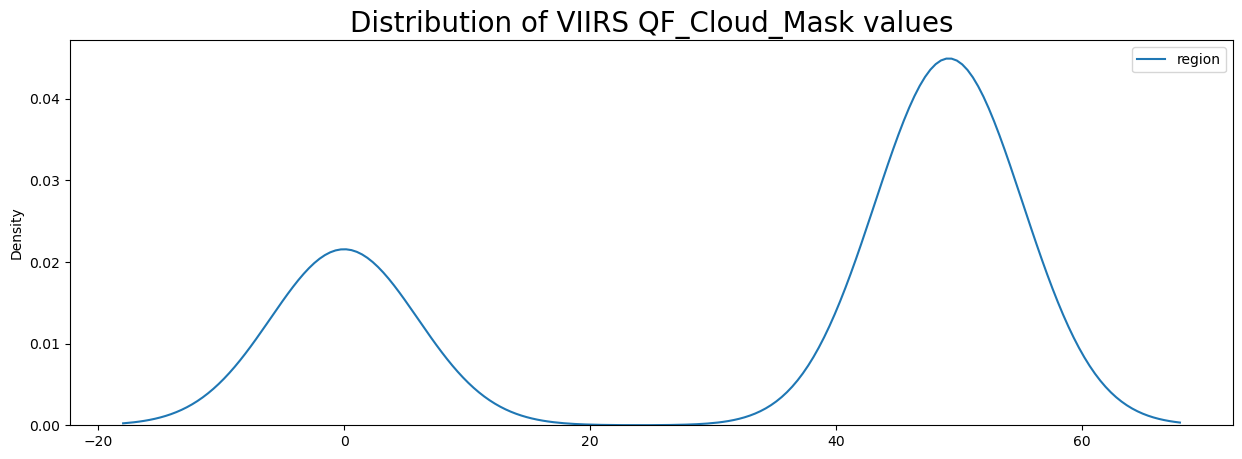

In [4]:
import geemap, ee
import seaborn as sns
import matplotlib.pyplot as plt
ee.Initialize()
india = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'India'))


viirs_lunar = ee.ImageCollection("NOAA/VIIRS/001/VNP46A2") \
                        .select("DNB_Lunar_Irradiance") \
                        .filterDate("2014-02-10","2014-02-12") \
                        .median() \
                        .unmask()

viirs_lunar_mask = viirs_lunar.lte(45)

vis_params_cloud = {'palette': ['380245', '23678b', '21908c', '39b185', 'fde725'],'opacity': 0.75}

# create a histogram
arr=geemap.ee_to_numpy(viirs_lunar, region=india)
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(arr.flatten(), label='region',legend=True, ax=ax)
plt.legend(fontsize=20)
plt.title('Distribution of VIIRS QF_Cloud_Mask values', fontsize=20);
plt.legend();

Map4 = geemap.Map()
Map4.addLayer(viirs_lunar.mask(viirs_lunar_mask), vis_params_cloud, "lunar")
Map4.addLayerControl()
Map4

In [4]:
sampled_points = viirs_quarterly_clean.sampleRegions(collection=turkey, scale=10000)
geemap.ee_export_vector(sampled_points, filename='output.csv')